In [2]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
82,83,Male,67,54,41
168,169,Female,36,87,27
149,150,Male,34,78,90
122,123,Female,40,69,58
176,177,Male,58,88,15


In [6]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
137,73,73
156,78,1
48,40,42
41,38,92
83,54,44


In [7]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

,income,score
137,73,73
14,20,13
44,39,28
179,93,90
71,49,42


In [8]:
import matplotlib.pyplot as plt

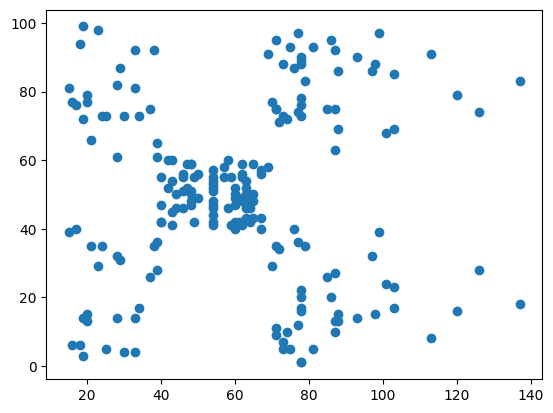

In [9]:
plt.scatter(data['income'], data['score'])

In [11]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

In [12]:
wcss_error

[269981.28,
 184131.88502788503,
 106348.37306211119,
 73679.78903948837,
 44454.47647967974,
 38797.9027638142,
 35079.50456270782,
 30109.190527119936,
 22984.459073182563,
 20031.433282403872]

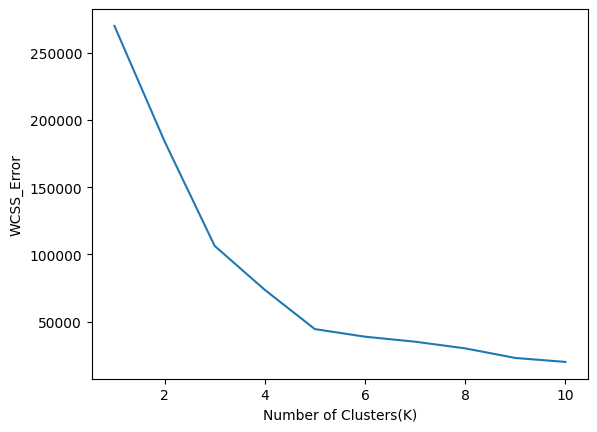

In [14]:
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS_Error')
plt.plot(k_values,wcss_error)

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)
pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [16]:
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [17]:
data['cluster'] = pred
data.head()

,income,score,cluster
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


In [19]:
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]

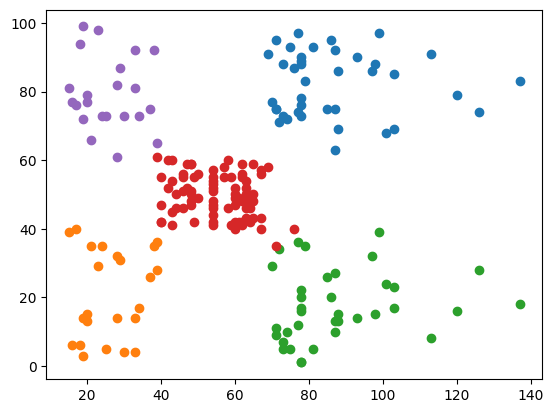

In [20]:
plt.scatter(c1['income'],c1['score'])
plt.scatter(c2['income'],c2['score'])
plt.scatter(c3['income'],c3['score'])
plt.scatter(c4['income'],c4['score'])
plt.scatter(c5['income'],c5['score'])

In [21]:
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [25.72727273, 79.36363636]])